<a href="https://colab.research.google.com/github/DonRoboto/CursoMOO/blob/main/MOO_SumW_2_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
from sympy import *
import matplotlib.pyplot as plt
import scipy, pylab


In [2]:
x0 = Symbol('x0')
x1 = Symbol('x1')

#Tarea 1
#𝐹(𝑥_1,𝑥_2 ) = (𝑥_1−1)^2+(𝑥_2−1)^4; (𝑥_1+1)^2+(𝑥_2+1)^2] con 𝒳=[−3, 3]×[−3, 3]
f1 = (x0-1)**2 + (x1-1)**4
f2 = (x0+1)**2 + (x1+1)**2


In [3]:
#random.seed(1000)
alpha = 0.01

ro = 0.8
c = 0.1

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


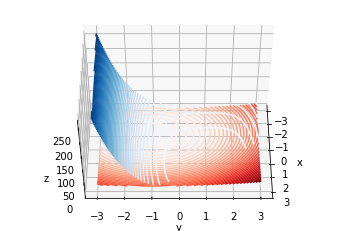

In [4]:
#graficamente
def fg1(x, y):  
  return (x-1)**2 + (y-1)**4
      
def fg2(x, y):  
  return (x+1)**2 + (y+1)**2
  

xg = np.linspace(-3, 3, 100)
yg = np.linspace(-3, 3, 100)

Xg, Yg = np.meshgrid(xg, yg)
Zg1 = fg1(Xg, Yg)
Zg2 = fg2(Xg, Yg)


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.view_init(50, 0)

ax.contour3D(Xg, Yg, Zg1, 50, cmap='Blues')
ax.contour3D(Xg, Yg, Zg2, 50, cmap='Reds')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [5]:
#crear pesos
p_1 = [i/100 for i in range(0, 101)]
p_2=[]

for i in range(len(p_1)):
  p_2.append(round(1-p_1[i],2))

print(p_1)
print(p_2)

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
[1.0, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9, 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8, 0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7, 0.69, 0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6, 0.59, 0.58, 0.57, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5, 0.49, 0.48, 0.47, 0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.

In [6]:
def Gradient(fx, X):
  return np.array( [ [fx.diff(x0).subs( [(x0, float(X[0])), (x1, float(X[1]))]  )], [fx.diff(x1).subs( [(x0, float(X[0])), (x1, float(X[1]))]  ) ] ] )  

def Direction(fx, X):  
  dy = -1 * Gradient(fx, X)
  return dy

def Step_Size(fx, X, alpha, ro, c):
  counter = 0
  origen_0 = fx.subs([(x0, float(X[0])), (x1, float(X[1]))]).doit()
  f_k = origen_0
  
  pk = Direction(fx, X)
  
  g = Gradient(fx, X)

  while True:
    dato1 = X  + (alpha * pk)
    destino = fx.subs([(x0, float(dato1[0])), (x1, float(dato1[1]))]).doit()

    dato3 = (c * alpha) * np.dot(g.T, pk)
    penal_0 = dato3[0,0]

    f_n = round(float(destino), 6)
    penalty = round(float(penal_0), 6)

    if (f_n <= f_k + penalty) or (counter>100):
      return alpha

    alpha = round(ro * alpha, 6)
    counter = counter + 1



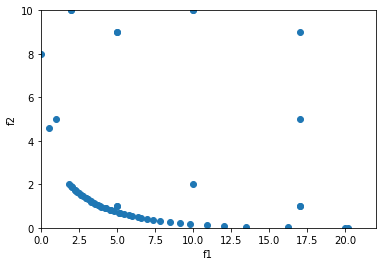

In [7]:

ax = pylab.subplot(111)

prev_val = 1000000
epsilon = 0.00001
counter=0
max_value=10000

graph1=[]
graph2=[]


for j in range(len(p_1)):
  xv0 = random.randint(-3, 3)
  xv1 = random.randint(-3, 3)

  X = np.array([[xv0], [xv1]])

  w1 = p_1[j]
  w2 = p_2[j]

  func = w1 * f1 + w2 * f2
  
  while True:
    pk = Direction(func, X)

    alpha = Step_Size(func, X, alpha, ro, c)

    Xn = X + (alpha * pk) 
    actual_val = func.subs([ (x0, float(Xn[0])), (x1, float(Xn[1])) ] )

    if (round(abs(actual_val - prev_val), 6)<epsilon) or (counter>=max_value):
      break

    X = Xn
    prev_val = actual_val
    counter = counter + 1

  f_1 = f1.subs([(x0, float(X[0])), (x1, float(X[1]))]).doit()
  f_2 = f2.subs([(x0, float(X[0])), (x1, float(X[1]))]).doit()

  graph1.append(f_1)
  graph2.append(f_2)


ax.set_xlabel('f1')
ax.set_ylabel('f2')

plt.scatter(graph1, graph2)

plt.xlim(0, 22)
plt.ylim(0, 10)
plt.show()

